## Using Statistics In Marketing Analytics
#### By Kevin Eddy
For this project I'm using the dataset found in the following link: https://docs.google.com/spreadsheets/d/111Qu0KWR5ILzmmB2TVZTwesUI-zkNW7m/edit#gid=1497916650

In today's competitive advertising landscape, it is essential to regularly analyze campaign data to gain insights into the performance of different marketing strategies. This project aims to perform a comprehensive analysis of Meta and AdWords campaign data from 2019 to identify trends, craft and test hypotheses, and provide recommendations for improving future campaigns.

The analysis will involve the following steps:

 - Exploratory Data Analysis (EDA): Perform EDA to gain insights into the overall performance of the campaigns, such as impressions, clicks, conversions, and cost per conversion. Identify any significant trends or patterns in the data.
 - Hypothesis Testing: Formulate hypotheses based on the observations from EDA and test them using statistical methods. This will help to determine the impact of different campaign variables on performance.
 - Insight Generation: Interpret the results of the hypothesis tests and other analyses to generate actionable insights for improving future campaigns.
 - Recommendations: Develop recommendations for improving the next round of campaigns based on the insights gained from the analysis. This may include suggestions for optimizing ad copy, targeting, bidding strategies, and landing pages.
 
The project will provide valuable insights into the effectiveness of the Meta and AdWords campaigns conducted in 2019. The findings will help to improve the efficiency of future campaigns, leading to increased conversions and a higher return on investment (ROI). The recommendations provided in the project will be actionable and tailored to the specific needs of the business.

To make this analysis a bit easier follow, I have broken it into 4 parts:
 - Getting to Know the Data
 - Understanding Your Data Samples
 - Testing Your Hypothesis
 - Choosing and Executing a Model
 - Findings and Recommendation 

In [81]:
## Import Libraries 
import numpy as np                            ## adds powerful data structures to python to perform mathematical operations on arrays.
import pandas as pd                           ## library perform general eda.
import seaborn as sns                         ## data visualization library based on matplotlib to provide statistical graphs. 
from matplotlib import pyplot as plt          ## creates quality static, animated, and visualizations in python.
import plotly.express as px
import scipy
from scipy import stats
from scipy.stats import iqr
from scipy.stats import norm
from scipy.stats import kstest

In [31]:
# load fiscal_calendar table
df = pd.read_csv("/Users/kevineddy/Desktop/Data Projects/Marketing Analysis/Capstone 1.xlsx - Capstone Dataset.csv")


Before we begin, print a sample of the dataframe to make sure we imported it correctly

In [32]:
df.sample(10)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
187,7/7/2019,FB_Jul19,1280,46,12,$134,3.60%,26.51%,$2.90,AW_Jul19,4571,54,8,$111,1.19%,14.20%,$2.05
170,6/20/2019,FB_Jun19,1944,58,17,$104,2.97%,28.65%,$1.80,AW_Jun19,5277,76,6,$91,1.44%,7.63%,$1.20
267,9/25/2019,FB_Sep19,3081,47,12,$130,1.51%,26.45%,$2.79,AW_Sep19,4354,58,5,$168,1.34%,8.43%,$2.88
66,3/8/2019,FB_Mar19,1232,24,10,$142,1.97%,40.58%,$5.84,AW_Mar19,4507,70,9,$99,1.56%,12.12%,$1.40
330,11/27/2019,FB_Nov19,1960,68,15,$109,3.45%,21.48%,$1.61,AW_Nov19,4721,58,8,$162,1.23%,13.60%,$2.79
229,8/18/2019,FB_Aug19,1422,51,13,$78,3.56%,25.93%,$1.55,AW_Aug19,4561,70,6,$122,1.53%,9.31%,$1.76
165,6/15/2019,FB_Jun19,2673,33,9,$56,1.23%,26.10%,$1.70,AW_Jun19,4456,40,4,$188,0.90%,10.00%,$4.70
349,12/16/2019,FB_Dec19,2930,72,16,$124,2.46%,22.77%,$1.72,AW_Dec19,4089,89,5,$118,2.17%,6.13%,$1.33
303,10/31/2019,FB_Oct19,2902,64,18,$85,2.21%,27.80%,$1.32,AW_Oct19,4039,38,5,$189,0.94%,12.93%,$4.99
179,6/29/2019,FB_Jun19,1951,46,11,$129,2.33%,24.40%,$2.83,AW_Jun19,4683,48,7,$149,1.02%,15.50%,$3.13


## Getting to Know the Data
Let's get started with becoming familiar with the data.

### Measures of Central Tendency
The Meausers of Central Tendency include the mean, median, and mode. These measures help us identify the middle of the data which gives us a quick understanding of the audience and how well the campaigns performed.

#### Facebook

In [33]:
# return summary statistics for the data
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


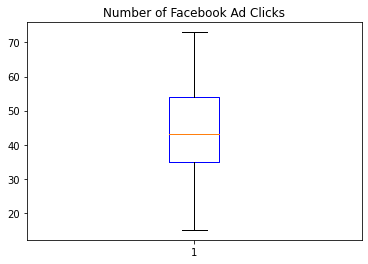

In [34]:
# FB Clicks
plt.boxplot(df['Facebook Ad Clicks'], boxprops=dict(color='blue'))
plt.title('Number of Facebook Ad Clicks');

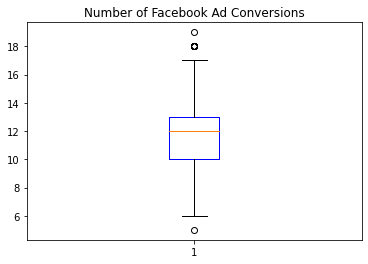

In [35]:
# FB Conversions
plt.boxplot(df['Facebook Ad Conversions'], boxprops=dict(color='blue'))
plt.title('Number of Facebook Ad Conversions');

The box plot for Clicks looks good with a normal distribution. However, the box plot for Conversions shows there are some outliers in the data. Median may be a better representation of the average number conversions.

In [36]:
# the describe function doesn't include median and mode so we'll add them here
# create a dictionary to store the median and mode
centralTendency = {}
centralTendency['Conversions Median'] = df['Facebook Ad Conversions']. median()
centralTendency['Conversion Mode'] = df['Facebook Ad Conversions'].mode()[0]
centralTendency['Clicks Median'] = df['Facebook Ad Clicks']. median()
centralTendency['Clicks Mode'] = df['Facebook Ad Clicks'].mode()[0]

centralTendency

{'Conversions Median': 12.0,
 'Conversion Mode': 13,
 'Clicks Median': 43.0,
 'Clicks Mode': 36}

#### Clicks
 - Mean: 44.04
 - Median: 43.00
 - Mode: 36.00
 - Std.Dev: 12.14
 - Range: 58.00
 
The Std. Deviation is a little high, showing that the data is spread out over a larger range of values and two-thirds of the campaigns received between 32 and 56 clicks.

#### Conversions
 - Mean: 11.74
 - Median: 12
 - Mode: 13
 - Std.Dev: 2.92
 - Range: 14.00
 
The Std. Deviation for conversions is more reasonable, showing that two-thirds of the campaigns received between 9 and 15 conversion.
 
#### Adwords

Text(0.5, 1.0, 'Number of Adwords Ad Clicks')

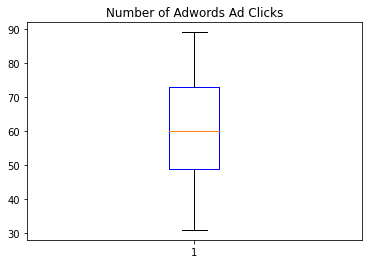

In [76]:
# Adwords Clicks
plt.boxplot(df['AdWords Ad Clicks'], boxprops=dict(color='blue'))
plt.title('Number of Adwords Ad Clicks')

Text(0.5, 1.0, 'Number of Adwords Ad Conversions')

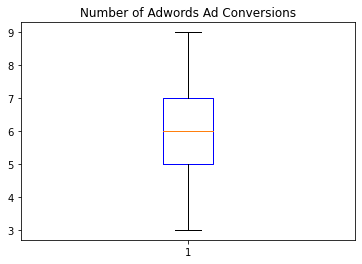

In [75]:
# Adwords Conversions
plt.boxplot(df['AdWords Ad Conversions'], boxprops=dict(color='blue'))
plt.title('Number of Adwords Ad Conversions')

Both box plots look good and don't show any outliers. 

In [40]:
# the describe function doesn't include median and mode so we'll add them here
# create a dictionary to store the median and mode
centralTendency = {}
centralTendency['Conversions Median'] = df['AdWords Ad Conversions']. median()
centralTendency['Conversion Mode'] = df['AdWords Ad Conversions'].mode()[0]
centralTendency['Clicks Median'] = df['AdWords Ad Clicks']. median()
centralTendency['Clicks Mode'] = df['AdWords Ad Clicks'].mode()[0]

centralTendency

{'Conversions Median': 6.0,
 'Conversion Mode': 5,
 'Clicks Median': 60.0,
 'Clicks Mode': 78}

#### Clicks
 - Mean: 60.4
 - Median: 60.0
 - Mode: 78
 - Std.Dev: 14.4
 - Range: 58

Similar to the Facebook clicks, the std. dev for Adwords clicks is a pretty high too. Two-thirds of the campaigns received between 46 and 74 clicks. 

#### Conversions
 - Mean: 6.0
 - Median: 6.0
 - Mode: 5
 - Std.Dev: 1.6
 - Range: 6
 
While two-thirds of campaigns in Adwords recieved roughly between 4 and 8 conversions, which is more reasonable.
 

## Frequency Table

In [66]:
# Create a Frequency Table For FB Conversions
# Group number of Occurances together
# Define ranges 
ranges = [1,6,11,16, float('inf')] 
labels = ['1-5', '6-10', '11-15', '16+']
#Create a pandas series 
series = pd.Series(df['Facebook Ad Conversions'])
# Group values based on ranges and compute frequency table
frequency_table = pd.cut(series, bins=ranges, labels=labels, include_lowest=True).value_counts().sort_index()
frequency_table



1-5        8
6-10     167
11-15    165
16+       25
Name: Facebook Ad Conversions, dtype: int64

In [104]:
#calculate correlation coefficient between FB conversions and FB clicks
#r = scipy.stats.pearsonr(x='Facebook Ad Clicks', y= 'Facebook Ad Conversions')[0]
#pearsonr returning error "ValueError: x and y must have the same length" - df is same length, need to look into this

from numpy import cov
covariance = cov(df['Facebook Ad Clicks'], df['Facebook Ad Conversions'])
r = covariance/(np.std(df['Facebook Ad Clicks'])* np.std(df['Facebook Ad Conversions']))
r

array([[4.16232571, 0.8761755 ],
       [0.8761755 , 0.24157217]])

The correlation coefficient is 0.88 which indicates that Facebook Cliks and Conversions have a strong positive correlation.

The scatter plot (below) and the positive correlation coefficient suggest that there is a positive correlation between clicks and conversions for Facebook Ads. This means that as the number of clicks on an ad increases, the number of conversions is also likely to increase.

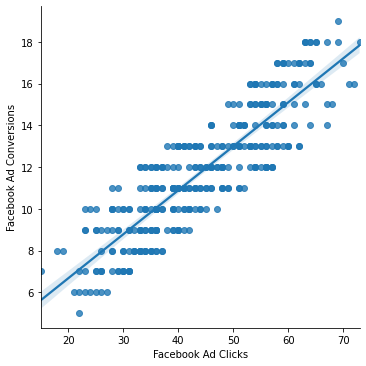

In [90]:
# Create a scatter plot showing the correlation between FB clicks and FB conversions
graph = sns.lmplot(x='Facebook Ad Clicks', y= 'Facebook Ad Conversions', data= df)

In [56]:
# Create a Frequency Table For Adwords Conversions
# Group number of Occurances together
# Define ranges 
ranges = [1,3,5,7, float('inf')] 
labels = ['1-2', '3-4', '5-6', '7+']
#Create a pandas series 
series = pd.Series(df['AdWords Ad Conversions'])
# Group values based on ranges and compute frequency table
frequency_table = pd.cut(series, bins=ranges, labels=labels, include_lowest=True).value_counts().sort_index()
frequency_table

1-2     22
3-4    134
5-6    137
7+      72
Name: AdWords Ad Conversions, dtype: int64

In [106]:
#calculate correlation coefficient between Adwords conversions and Adwords clicks
covariance = cov(df['AdWords Ad Clicks'], df['AdWords Ad Conversions'])
r = covariance/(np.std(df['AdWords Ad Clicks'])* np.std(df['AdWords Ad Conversions']))
r

array([[8.84935953, 0.44922395],
       [0.44922395, 0.11362427]])

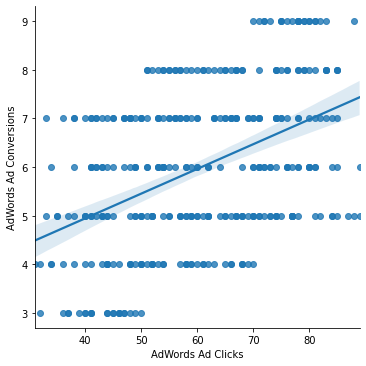

In [108]:
# Create a scatter plot showing the correlation between Adwords clicks and Adwords conversions
graph = sns.lmplot(x='AdWords Ad Clicks', y= 'AdWords Ad Conversions', data= df)

The correlation coefficient for Adwords clicks and conversions is 0.45, which is a moderate to low correlation. This means that while there is a relationship between the two variables, it's not a strong one.

However, the scatter plot is definitely not showing much of a correlation.

## Summary

## Understanding Your Data
### Distribution and Variables
Types of variables: 
* Facebook Ad Views: **Quantitative Independent Discrete**
* Facebook Ad Clicks: **Quantitative Independent Discrete**
* Cost per Facebook Ad: **Quantitative Dependent Continuous**
* Facebook Click-Through Rate: **Quantitative Independent Continous**
* Facebook Conversion Rate: **Quantitative Independent Continous**
* Facebook Cost per Click: **Quantitative Independent Continous**
<br>
<br>
* AdWords Ad Views: **Quantitative Independent Discrete**
* AdWords Ad Clicks: **Quantitative Independent Discrete**
* Cost per AdWords Ad: **Quantitative Dependent Continuous**
* AdWords Click-Through Rate: **Quantitative Independent Continous**
* AdWords Conversion Rate: **Quantitative Independent Continous**
* AdWords Cost per Click: **Quantitative Independent Continous**


**What does the correlation coefficient and scatter plot tell you about the relationship between clicks and conversions for the AdWords Ad and Facebook Ads?**

Based on the correlation coefficient, we can see that there is a stronger correlation between clicks and conversions on Facebook than on Google. This suggests that Facebook might be a better place to run ads if our goal is to generate conversions.

## Understanding Your Data Samples

#### Facebook

array([[<Axes: title={'center': 'Facebook Ad Clicks'}>]], dtype=object)

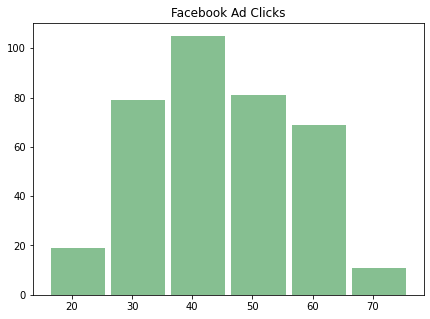

In [112]:
# Create a histogram to see the distribution of Clicks with bucket size of 10
df.hist(column='Facebook Ad Clicks', bins=[16,26,36,46,56,66,76], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'Facebook Ad Conversions'}>]],
      dtype=object)

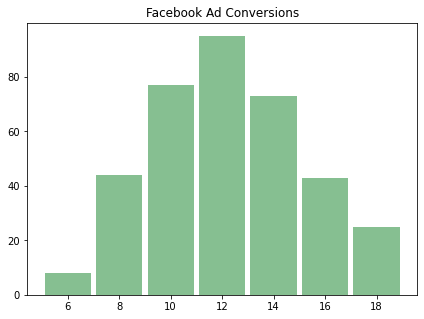

In [113]:
# Create a histogram to see the distribution of Conversions with bucket size of 2
df.hist(column='Facebook Ad Conversions', bins=[5,7,9,11,13,15,17,19], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

From looking at the above histograms above for Facebook clicks and conversions we can conclude that the data is normally distributed 

#### AdWords

array([[<Axes: title={'center': 'AdWords Ad Clicks'}>]], dtype=object)

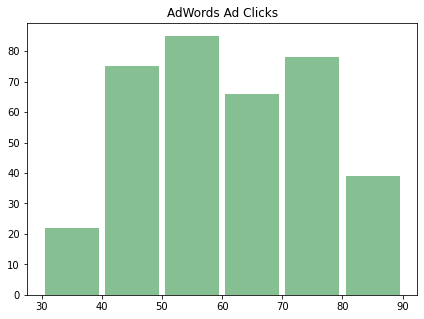

In [126]:
# Create a histogram to see the distribution of Clicks with bucket size of 10
df.hist(column='AdWords Ad Clicks', bins=[30,40,50,60,70,80,90], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'AdWords Ad Conversions'}>]], dtype=object)

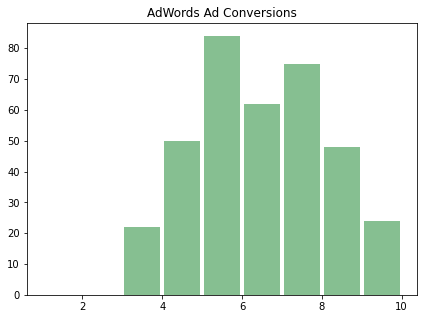

In [132]:
# Create a histogram to see the distribution of Conversions with bucket size of 1
df.hist(column='AdWords Ad Conversions', bins=[1,2,3,4,5,6,7,8,9,10], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='AdWords Ad Conversions', ylabel='Count'>

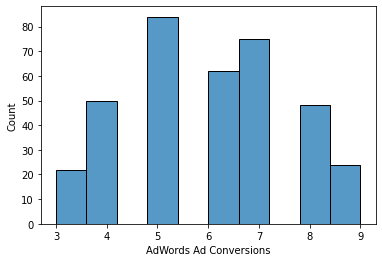

In [146]:
#Confirming that our histogram for Adwords conversions has the correct distribution 
#Sturge’s rule
bin_count = int(np.ceil(np.log2(len(df['AdWords Ad Conversions']))) + 1)
sns.histplot(x=df['AdWords Ad Conversions'],bins=bin_count)

<Axes: xlabel='AdWords Ad Conversions', ylabel='Count'>

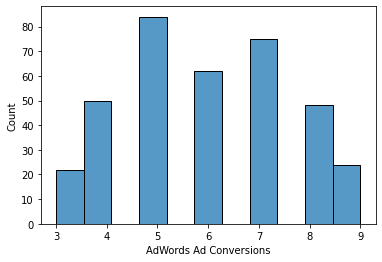

In [147]:
#Freedman-Diaconis rule
q1 = df['AdWords Ad Conversions'].quantile(0.25)
q3 = df['AdWords Ad Conversions'].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df['AdWords Ad Conversions']) ** (1 / 3))
bin_count = int(np.ceil((df['AdWords Ad Conversions'].max() - df['AdWords Ad Conversions'].min()) / bin_width))
sns.histplot(x=df['AdWords Ad Conversions'],bins=bin_count)

After setting up our histograms for Adwords clicks and conversions and confirming the conversions distribution with the Surge's rule and Freedman-Diaconis rule we can conclude that the data is normally distributed.

## Testing Your Hypothesis

### Hypothesis Testing

* **Evaluation Question:** Is there a difference in the number of Conversions on Facebook vs Adwords?

* **Hypothesis:**
Three Parts of a Clear Hypothesis:

    * What will change?

    * How will it change?

    * What will cause the change?

**Our cost per conversion will be lower if we advertise on Facebook rather than on Adwords.**
<br>

    H0: There is no difference in cost per conversion between Facebook and Adwords.
    H1: There is a difference in cost per conversion between Facebook and Adwords.

* **Required Variables:**

* **Choosing a Measurement Approach:**

* **Selecting an Analysis:**

In [133]:
# Find the Mean for Facebook Ad Conversions and Adword Ad Conversions
conversion_means = {}
conversion_means['Facebook Conversion Mean'] = df['Facebook Ad Conversions']. mean()
conversion_means['AdWords Conversions Mean'] = df['AdWords Ad Conversions']. mean()
conversion_means

{'Facebook Conversion Mean': 11.742465753424657,
 'AdWords Conversions Mean': 5.980821917808219}

In [155]:
# Find the variance on FB Conversions and Adwords Conversions
# data_group1: FB Ads Conversions
# data_group2: Adwords Ads Conversions
#equal_var = 'True': The standard idependent two sample t-test will be conducted by taking into consideration the equal pop variances.
#equal_var = 'False': The Welch's t-test will be conducted by not taking into consideration the equal pop variances.

data_group1 = df['Facebook Ad Conversions']
data_group2 = df['AdWords Ad Conversions']

print('Facebook Ad Conversion variance: ' + str(np.var(data_group1)),'AdWords Ad Conversion variance: ' + str(np.var(data_group2)))

Facebook Ad Conversion variance: 8.530936385813469 AdWords Ad Conversion variance: 2.6434678176018127


In [156]:
# Perform a T-Test 
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=32.88402060758184, pvalue=4.559680828599345e-146)

## Summary

Is there a difference between the number of conversions on the Facebook platform versus the AdWords platform?

Yes, there is a difference between the number of conversions on Facebook and AdWords.

**The T-stat indicates that there is a very large difference between the means of the two groups. Our p-value is also below 0.05 which means we can reject our null hypothesis and accept our alternative hypothesis, that there is a difference in cost per conversion between Facebook and Adwords.**


## Choosing a Model

**How many Facebook ad conversions can I expect given a certain number of Facebook ad clicks?**

Simple Linear Regression

/Users/kevineddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevineddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


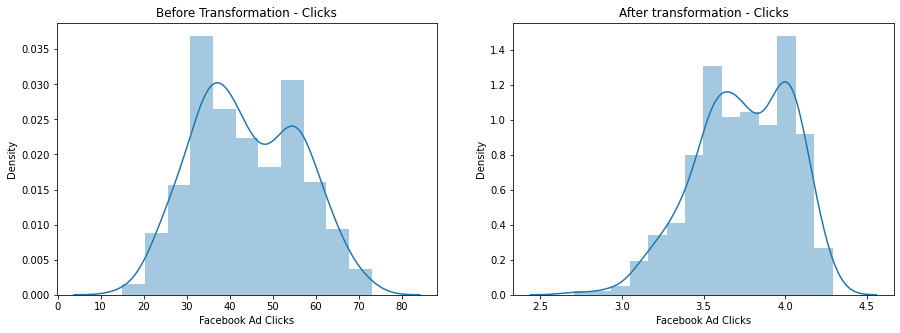

In [157]:
target = df['Facebook Ad Conversions']
inputs = df['Facebook Ad Clicks']

#Distribution
#Independent Varibale. - clicks
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(inputs)
plt.title('Before Transformation - Clicks')
plt.subplot(1,2,2)
sns.distplot(np.log(inputs))
plt.title('After transformation - Clicks')
plt.show()



In [131]:
df_fb_campaign.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


In [188]:
#Calculate the upper and lower limits for clicks
q1 = np.percentile(df_fb_campaign['Facebook Ad Clicks'], 25)
q3 = np.percentile(df_fb_campaign['Facebook Ad Clicks'], 75)

#IQR for Clicks
iqr_clicks = iqr(df_fb_campaign['Facebook Ad Clicks'])
print('IQR of Clikcs:', iqr_clicks)

#Outliers for Clicks
lower_outlier = q1-1.5*iqr_clicks
upper_outlier = q3+1.5*iqr_clicks
print('lower outlier:', lower_outlier)
print('upper outlier:', upper_outlier)

#create arrays of boolean vlaues indicationg the outlier rows 
upper_arrary = np.where(df_fb_campaign['Facebook Ad Clicks']>=upper_outlier)[0]
lower_arrary = np.where(df_fb_campaign['Facebook Ad Clicks']<=lower_outlier)[0]

#Remove the outliers
df_fb_campaign.drop(index=upper_arrary, inplace=True)
df_fb_campaign.drop(index=lower_arrary, inplace=True)

#print new shape of the df
print('New Shape: ', df_fb_campaign.shape)

IQR of Clikcs: 19.0
lower outlier: 6.5
upper outlier: 82.5
New Shape:  (365, 17)


In [189]:
#Calculate the upper and lower limits for conversions
q1_conv = np.percentile(df_fb_campaign['Facebook Ad Conversions'], 25)
q3_conv = np.percentile(df_fb_campaign['Facebook Ad Conversions'], 75)

# IQR of Conversions
iqr_conv = iqr(df_fb_campaign['Facebook Ad Conversions'])
print('IQR of Conversions:',iqr_conv)

#Outliers for conversions
lower_outlier = q1_conv-1.5*iqr_conv
upper_outlier = q3_conv+1.5*iqr_conv
print('lower outlier:', lower_outlier)
print('upper outlier:', upper_outlier)

#create arrays of boolean vlaues indicationg the outlier rows 
upper_arrary_conv = np.where(df_fb_campaign['Facebook Ad Conversions']>=upper_outlier)[0]
lower_arrary_conv = np.where(df_fb_campaign['Facebook Ad Conversions']<=lower_outlier)[0]

#Remove the outliers
df_fb_campaign.drop(index=upper_arrary_conv, inplace=True)
df_fb_campaign.drop(index=lower_arrary_conv, inplace=True)

#print new shape of the df
print('New Shape: ', df_fb_campaign.shape)

IQR of Conversions: 3.0
lower outlier: 5.5
upper outlier: 17.5
New Shape:  (353, 17)


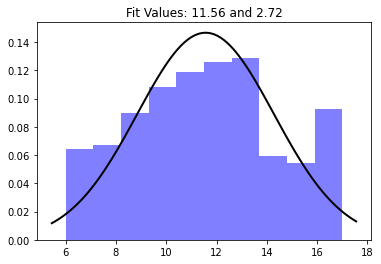

In [199]:
# mean and standard deviation
mu, std = norm.fit(df_fb_campaign['Facebook Ad Conversions'])
# Plot the histogram.
plt.hist(df_fb_campaign['Facebook Ad Conversions'], bins=10, density=True, alpha=0.5, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [223]:

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(df_fb_campaign, columns=['Facebook Ad Clicks'])

# Put the target (Facebook Ad Conversions) in another DataFrame
target = pd.DataFrame(df_fb_campaign, columns=["Facebook Ad Conversions"])

In [226]:
## Without a constant

import statsmodels.api as sm

X = df
y = target

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Facebook Ad Conversions   R-squared (uncentered):                   0.982
Model:                                 OLS   Adj. R-squared (uncentered):              0.982
Method:                      Least Squares   F-statistic:                          1.960e+04
Date:                     Fri, 07 Jul 2023   Prob (F-statistic):                   1.10e-310
Time:                             12:52:45   Log-Likelihood:                         -661.92
No. Observations:                      353   AIC:                                      1326.
Df Residuals:                          352   BIC:                                      1330.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Facebook Ad Clicks     0.2619      0.002    139.985      0.000       0.258       0.266
==============================================================================
Omnibus:                        8.327   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.677
Skew:                           0.022   Prob(JB):                       0.0965
Kurtosis:                       2.438   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:

X = df ## X usually means our input variables (or independent variables) in this case Clicks
y = target ## Y usually means our output/dependent variable in this case Conversions
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

/Users/kevineddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Facebook Ad Conversions   R-squared:                       0.736
Model:                                 OLS   Adj. R-squared:                  0.736
Method:                      Least Squares   F-statistic:                     980.1
Date:                     Fri, 07 Jul 2023   Prob (F-statistic):          1.26e-103
Time:                             12:53:47   Log-Likelihood:                -618.92
No. Observations:                      353   AIC:                             1242.
Df Residuals:                          351   BIC:                             1250.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8388      0.289      9.840      0.000       2.271       3.406
Facebook Ad Clicks     0.2009      0.006     31.306      0.000       0.188       0.214
==============================================================================
Omnibus:                      142.446   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.940
Skew:                           0.112   Prob(JB):                     4.68e-05
Kurtosis:                       1.857   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
#SLR
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [233]:
predictions = lm.predict(X)
print(predictions)

[[ 6.4548929 ]
 [10.07097962]
 [ 8.06204256]
 [ 8.26293626]
 [ 5.85221178]
 [10.27187333]
 [12.68259781]
 [12.68259781]
 [10.07097962]
 [11.07544816]
 [13.08438522]
 [14.08885376]
 [12.4817041 ]
 [11.27634186]
 [14.08885376]
 [ 9.06651109]
 [ 8.46382997]
 [10.87455445]
 [ 8.86561738]
 [12.88349152]
 [ 9.4682985 ]
 [12.07991669]
 [ 8.46382997]
 [11.47723557]
 [13.28527893]
 [ 7.66025514]
 [11.87902298]
 [13.88796005]
 [11.47723557]
 [ 8.46382997]
 [ 9.06651109]
 [ 7.86114885]
 [ 8.06204256]
 [ 7.86114885]
 [14.08885376]
 [11.07544816]
 [ 9.66919221]
 [ 9.06651109]
 [11.07544816]
 [11.07544816]
 [ 9.87008592]
 [ 8.66472368]
 [13.68706634]
 [10.87455445]
 [ 9.06651109]
 [11.27634186]
 [ 8.06204256]
 [ 9.06651109]
 [ 9.06651109]
 [12.4817041 ]
 [ 9.66919221]
 [ 9.2674048 ]
 [12.4817041 ]
 [ 8.46382997]
 [13.08438522]
 [11.67812928]
 [ 9.87008592]
 [13.88796005]
 [13.68706634]
 [12.07991669]
 [14.28974746]
 [ 8.46382997]
 [10.87455445]
 [11.47723557]
 [13.08438522]
 [11.67812928]
 [ 7.66025

TypeError: 'NoneType' object is not subscriptable

In [234]:
lm.score(X,y)

0.7363016899897157

In [235]:
lm.coef_

array([[0.        , 0.20089371]])

In [236]:
lm.intercept_

array([2.83880619])

In [239]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 1) (282, 1)
(71, 1) (71, 1)


In [241]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([[14.45336508],
       [ 9.84418427],
       [11.64777676],
       [13.25097009],
       [15.25496175]])

Text(0, 0.5, 'Predictions')

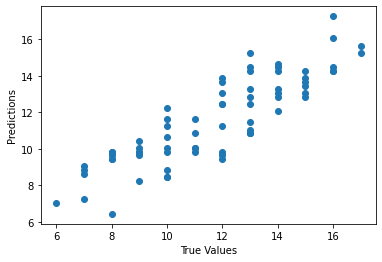

In [243]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [246]:
print( 'Score:', model.score(X_test, y_test))

Score: 0.7365619615472816


In [249]:
#Cross Validation 
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print( 'Cross-validated scores:', scores)

Cross-validated scores: [0.64854318 0.73529114 0.74404712 0.70630192 0.75463103 0.67295319]


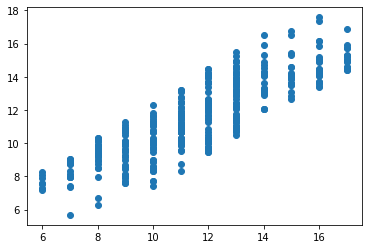

In [250]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [251]:
accuracy = metrics.r2_score(y, predictions)
print( 'Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.7298678340042231


In [259]:
# Predict the number of conversions for a desired number of ad likes
desired_ad_likes = 44  # Enter your desired number of ad likes here
predicted_conversions = model.predict([[desired_ad_likes]])

# Print the predicted number of conversions
print("Predicted Conversions:", predicted_conversions)

Predicted Conversions: [[11.64777676]]
